#PROGRAM STATEMENT
>Write a program to implement K-Means clustering to cluster the Spinem data set.

#CODE



In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data = pd.read_csv("/content/spinem.csv")
X = data[['pelvic_incidence', 'pelvic_radius', 'thoracic_slope']]
kmeans = KMeans(n_clusters = 3, random_state = 123)
model = kmeans.fit(X)
cluster_labels = kmeans.predict(X)
X['Cluster'] = cluster_labels
print(X)

     pelvic_incidence  pelvic_radius  thoracic_slope  Cluster
0           63.027817      98.672917         14.5386        2
1           39.056951     114.405425         17.5323        0
2           68.832021     105.985135         17.4861        2
3           69.297008     101.868495         12.7074        2
4           49.712859     108.168725         15.9546        2
..                ...            ...             ...      ...
305         47.903565     117.449062         14.7484        0
306         53.936748     114.365845         18.1972        0
307         61.446597     125.670725         13.5565        0
308         45.252792     118.545842         16.0928        0
309         33.841641     123.945244         17.6963        0

[310 rows x 4 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [17]:
C = kmeans.cluster_centers_
sil = silhouette_score(X, cluster_labels, metric='euclidean',sample_size = len(data))
print(C)

[[ 46.42903837 124.47018491  13.26250567]
 [ 80.49567418 120.00557969  12.78133516]
 [ 62.59438009 103.64870812  13.03697051]]


In [18]:
print("Quality of Clustering: ", sil)

Quality of Clustering:  0.35395863493542035


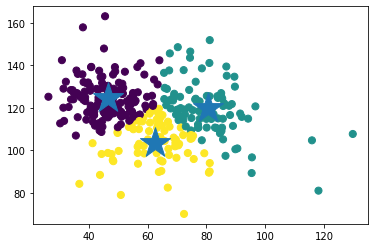

In [19]:
#For 2-D plot of the data points along with the centroids …
fig = plt.figure()
plt.scatter(X['pelvic_incidence'], X['pelvic_radius'], c=cluster_labels,
            s=50, cmap='viridis');
plt.scatter(C[:, 0], C[:, 1], marker='*', s=1000)

In [22]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('K-Means Clustering.ipynb')